Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 1.0820467954684299, CNR: -0.21547952250501512
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mT.tif
SNR: 41.92056655883789, CNR: -14.919000625610352
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 1.3061603421587071, CNR: -0.22495717386016148
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff
SNR: 1.1278606805028146, CNR: -0.25737085132178766


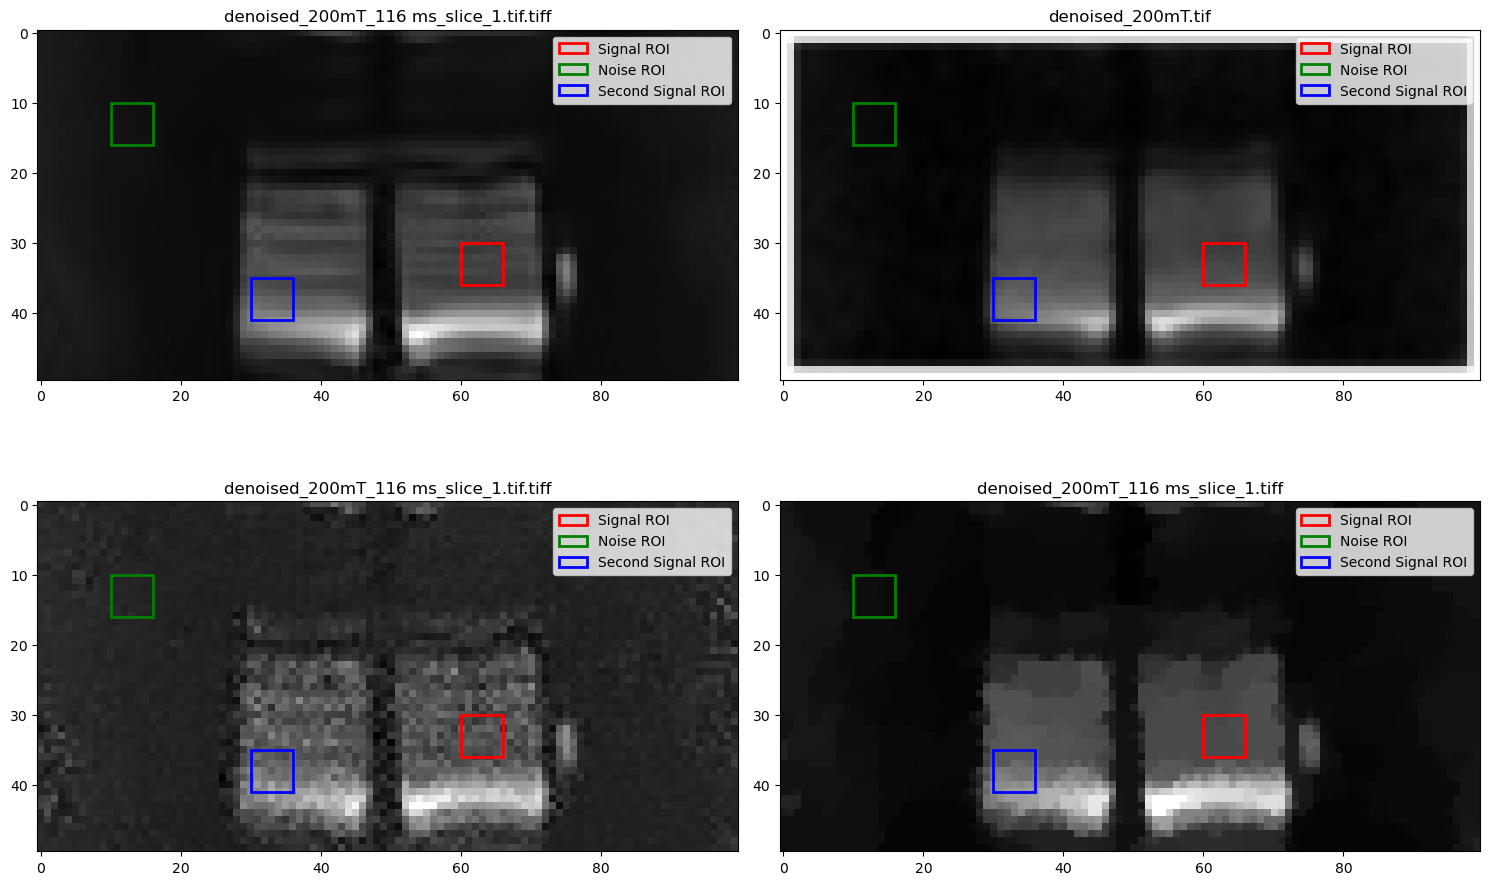

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()


image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff']

roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_20mT_32 ms_slice_1.tif.tiff
SNR: 1.0354519975753054, CNR: -0.15169166511580828
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_20mT.tif
SNR: 25.299057006835938, CNR: -8.184111595153809
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/20mT_32 ms_slice_1_denoised.tiff
SNR: 1.114221425172785, CNR: -0.15099544915042815
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_20mT_32 ms_slice_1.tiff
SNR: 1.123423131780653, CNR: -0.18341994938957723


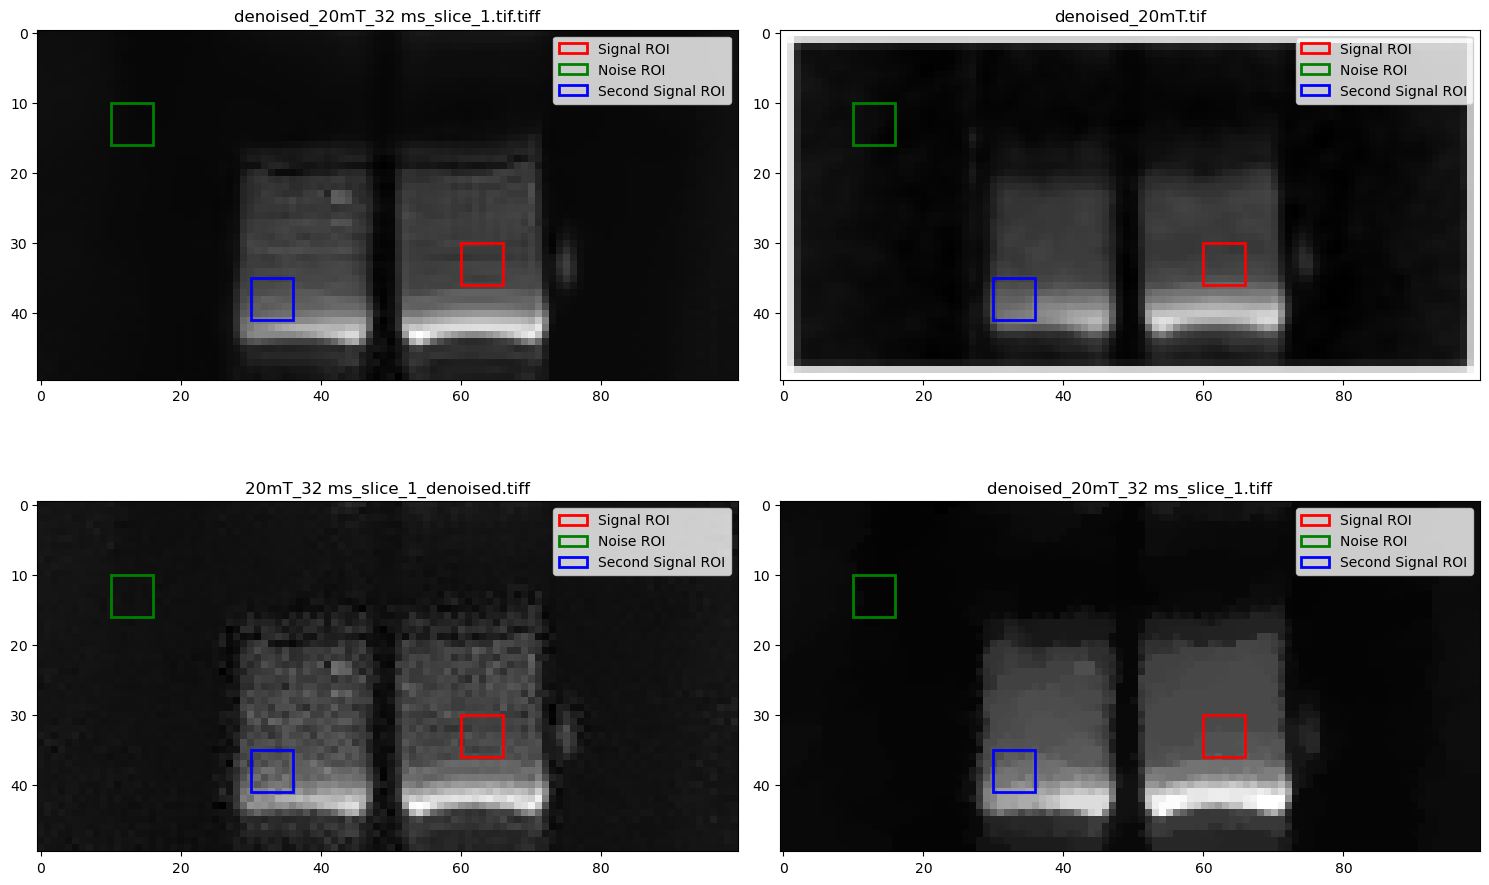

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()


image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_20mT_32 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_20mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/20mT_32 ms_slice_1_denoised.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_20mT_32 ms_slice_1.tiff']


roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_2mT_131 ms_slice_1.tif.tiff
SNR: 1.183930238698988, CNR: -0.28117300242534116
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_2mT.tif
SNR: 30.557952880859375, CNR: -10.027838706970215
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_2mT_131 ms_slice_1.tiff
SNR: 1.1720530004897984, CNR: -0.2692554190314402
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_2mT_131 ms_slice_1.tiff
SNR: 1.1720530004897984, CNR: -0.2692554190314402


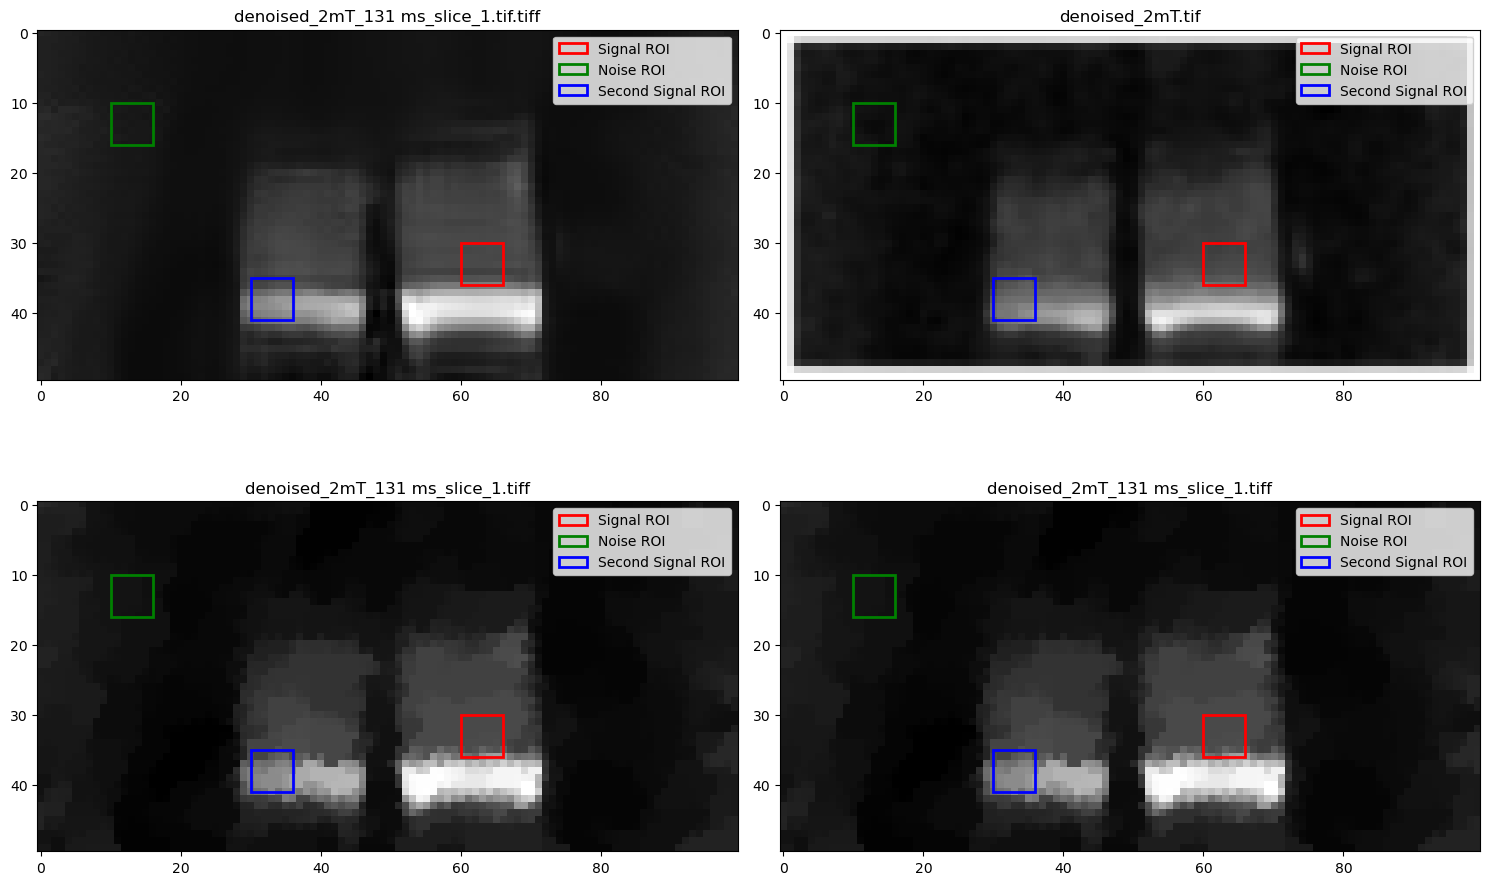

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()


image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_2mT_131 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_2mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_2mT_131 ms_slice_1.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_2mT_131 ms_slice_1.tiff']


roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_0mT_36 ms_slice_1.tif.tiff
SNR: 1.2235002089247922, CNR: -0.12602030936385075
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_0mT.tif
SNR: 18.937440872192383, CNR: -4.362904071807861
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_0mT_36 ms_slice_1.tiff
SNR: 1.1190087941145892, CNR: -0.12143521100226691
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_0mT_36 ms_slice_1.tiff
SNR: 1.1190087941145892, CNR: -0.12143521100226691


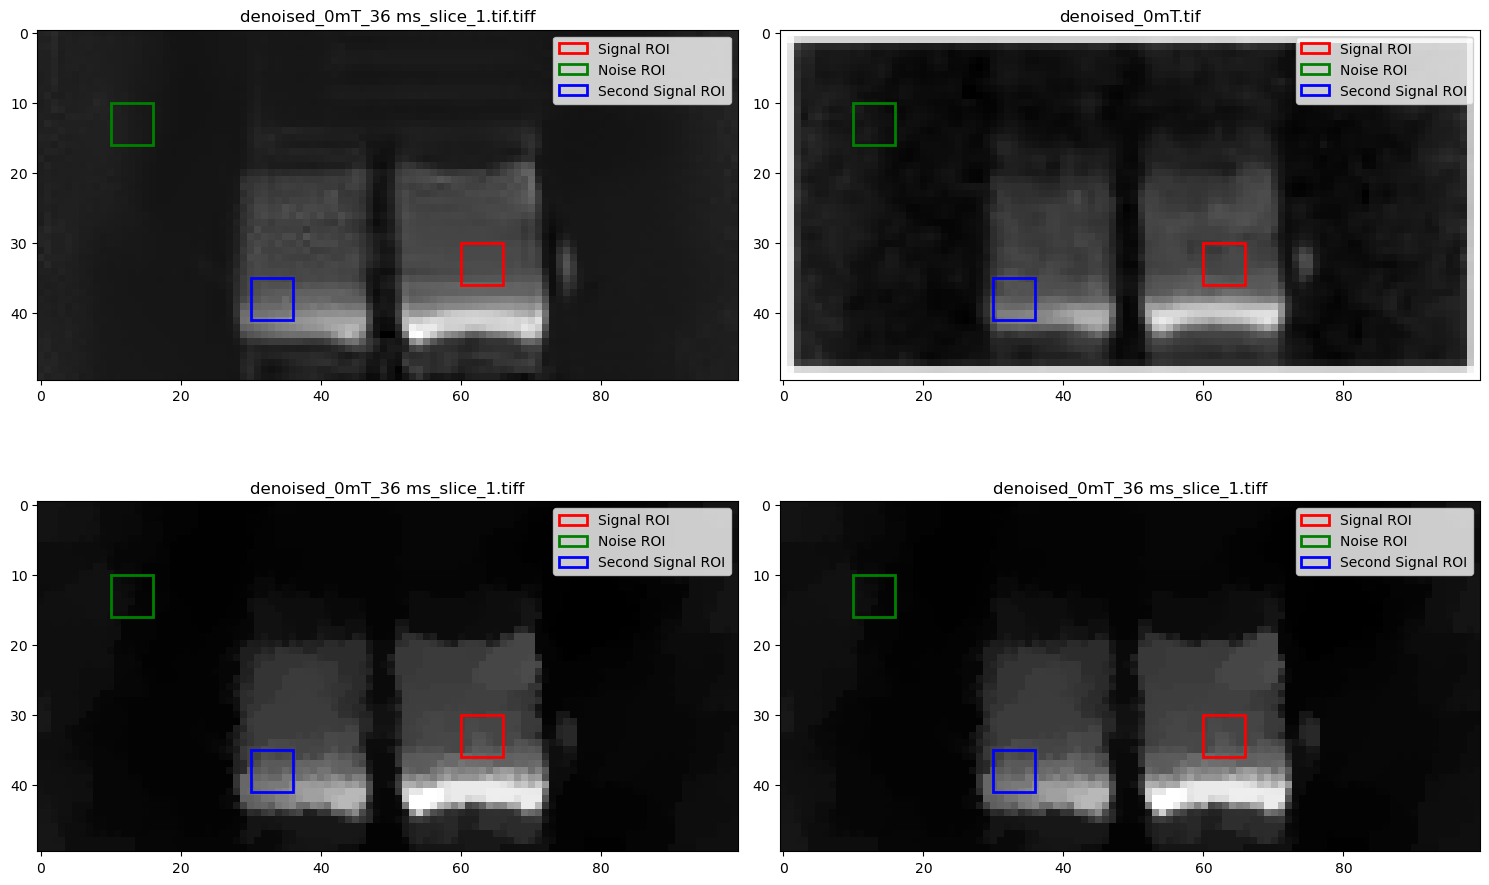

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_0mT_36 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_0mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_0mT_36 ms_slice_1.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_0mT_36 ms_slice_1.tiff']



roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)